In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Chia train test theo tỉ lệ 8:2**

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Btc.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train, test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
# 6. Reshape thành X=t,t+1,t+2..t+99  Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
# 8. Define SimpleRNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 2s 32ms/step - loss: 0.0097 - val_loss: 0.0052
Epoch 2/100
23/23 [==============================] - 0s 21ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 3/100
23/23 [==============================] - 0s 20ms/step - loss: 8.9097e-04 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 1s 22ms/step - loss: 7.9520e-04 - val_loss: 0.0015
Epoch 5/100
23/23 [==============================] - 0s 20ms/step - loss: 7.7001e-04 - val_loss: 0.0013
Epoch 6/100
23/23 [==============================] - 1s 27ms/step - loss: 7.1276e-04 - val_loss: 0.0012
Epoch 7/100
23/23 [==============================] - 1s 35ms/step - loss: 6.8938e-04 - val_loss: 0.0014
Epoch 8/100
23/23 [==============================] - 1s 36ms/step - loss: 6.7055e-04 - val_loss: 0.0013
Epoch 9/100
23/23 [==============================] - 1s 38ms/step - loss: 6.2340e-04 - val_loss: 0.0010
Epoch 10/100
23/23 [==============================] - 1s 39ms/step - los

In [10]:
# 10. Dự báo dữ liệu train, test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

9/9 [==============================] - 0s 11ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1101.9689226833038
Testing RMSE: 1656.8080448772853
Testing MAPE: 0.022185717302074835


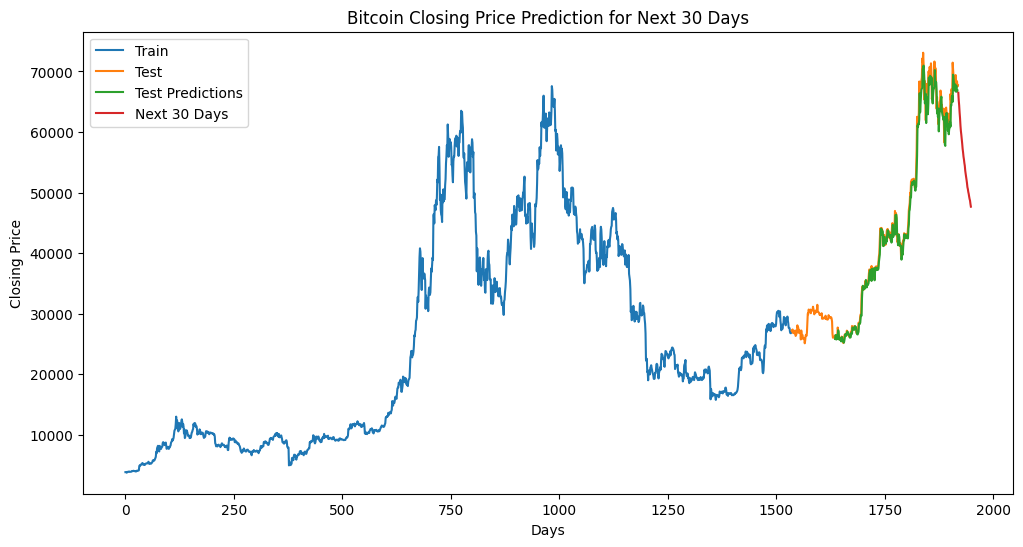

Predicted closing prices for the next 30 days:
[66482.96  65235.258 64406.188 63237.73  62287.59  61029.523 60140.17
 59511.027 58780.1   58055.273 57209.918 56641.598 55938.332 55470.75
 54875.004 54410.957 53599.95  53087.15  52581.75  52100.746 51561.684
 50897.65  50588.965 50113.58  49783.062 49336.79  48947.848 48688.47
 48133.125 47672.438]


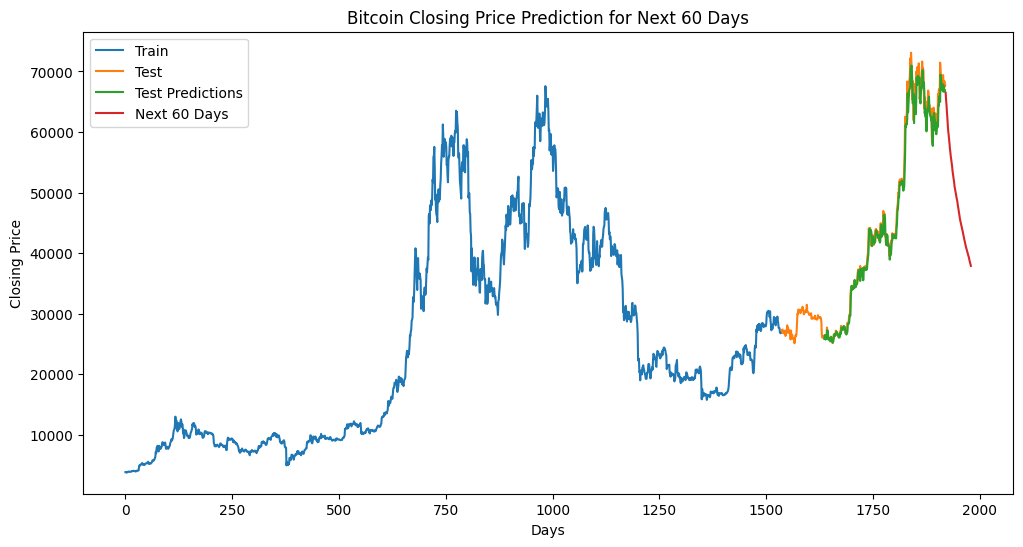

Predicted closing prices for the next 60 days:
[66482.96  65235.258 64406.188 63237.73  62287.59  61029.523 60140.17
 59511.027 58780.1   58055.273 57209.918 56641.598 55938.332 55470.75
 54875.004 54410.957 53599.95  53087.15  52581.75  52100.746 51561.684
 50897.65  50588.965 50113.58  49783.062 49336.79  48947.848 48688.47
 48133.125 47672.438 47236.72  46758.266 46340.188 45818.926 45429.223
 45128.992 44780.97  44510.023 44155.484 43850.242 43536.3   43155.14
 42842.223 42481.047 42149.69  41827.49  41490.04  41166.67  40884.684
 40642.414 40387.688 40121.207 39863.5   39610.91  39376.4   39065.95
 38728.62  38451.406 38162.8   37898.37 ]


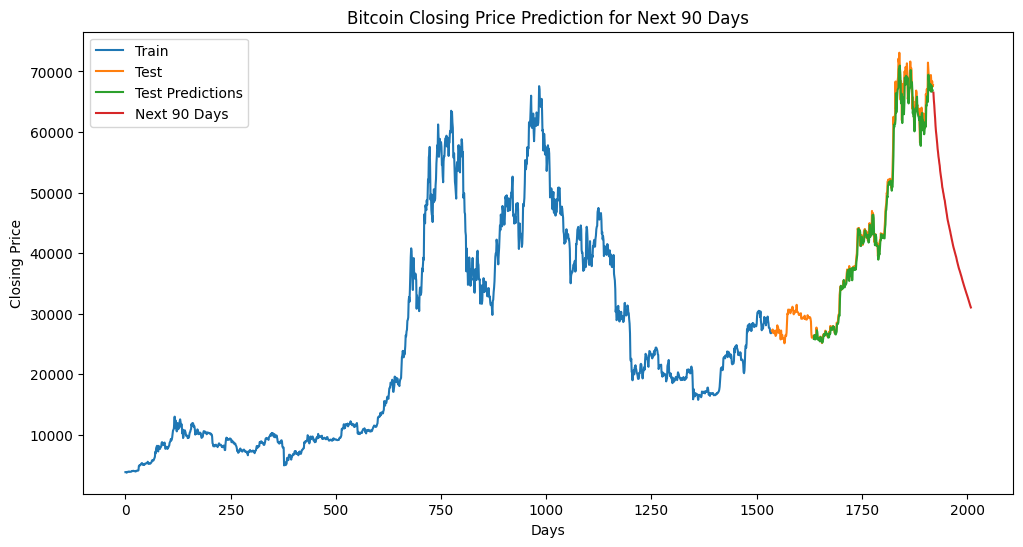

Predicted closing prices for the next 90 days:
[66482.96  65235.258 64406.188 63237.73  62287.59  61029.523 60140.17
 59511.027 58780.1   58055.273 57209.918 56641.598 55938.332 55470.75
 54875.004 54410.957 53599.95  53087.15  52581.75  52100.746 51561.684
 50897.65  50588.965 50113.58  49783.062 49336.79  48947.848 48688.47
 48133.125 47672.438 47236.72  46758.266 46340.188 45818.926 45429.223
 45128.992 44780.97  44510.023 44155.484 43850.242 43536.3   43155.14
 42842.223 42481.047 42149.69  41827.49  41490.04  41166.67  40884.684
 40642.414 40387.688 40121.207 39863.5   39610.91  39376.4   39065.95
 38728.62  38451.406 38162.8   37898.37  37616.72  37376.918 37185.25
 36960.348 36726.312 36484.258 36264.26  36023.37  35753.1   35503.195
 35262.2   35032.71  34795.656 34564.254 34343.312 34115.027 33904.133
 33678.574 33457.246 33250.543 33038.805 32828.81  32604.078 32371.898
 32149.916 31919.973 31689.408 31454.625 31243.111 31038.803]


In [13]:
# 13. Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

     # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 7:3**

In [14]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Btc.csv')
df1=df.reset_index()['Close']

In [15]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [17]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
# 6. Reshape thành X=t,t+1,t+2..t+99  Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
# 8. Define SimpleRNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 41ms/step - loss: 0.0308 - val_loss: 0.0100
Epoch 2/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 3/100
20/20 [==============================] - 1s 41ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 4/100
20/20 [==============================] - 1s 45ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 5/100
20/20 [==============================] - 1s 73ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 1s 33ms/step - loss: 9.4476e-04 - val_loss: 0.0010
Epoch 7/100
20/20 [==============================] - 1s 41ms/step - loss: 8.8709e-04 - val_loss: 9.1325e-04
Epoch 8/100
20/20 [==============================] - 0s 24ms/step - loss: 8.4478e-04 - val_loss: 8.8301e-04
Epoch 9/100
20/20 [==============================] - 0s 22ms/step - loss: 8.0788e-04 - val_loss: 7.4787e-04
Epoch 10/100
20/20 [==============================] - 0s 23ms/step - los

In [22]:
# 10. Dự báo dữ liệu train, test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

15/15 [==============================] - 0s 7ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [24]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 800.8087253342103
Testing RMSE: 1239.0185349423618
Testing MAPE: 0.019616437562814414


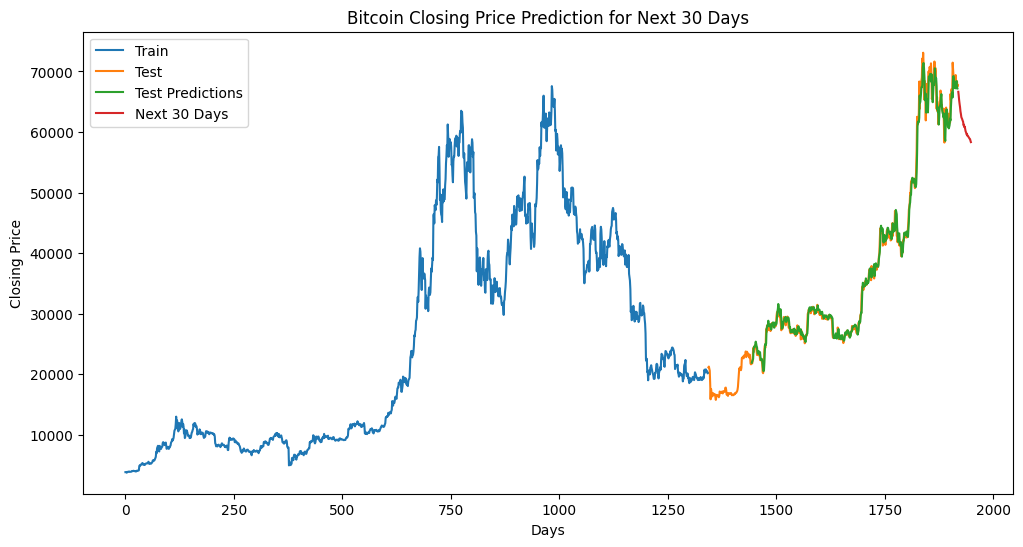

Predicted closing prices for the next 30 days:
[66635.03  65963.09  65205.887 64624.63  64108.605 63406.598 62986.074
 62453.76  62271.203 62109.56  61863.887 61720.49  61107.98  61214.594
 60791.51  60851.46  60437.406 60069.258 59925.637 59607.75  59675.207
 59374.09  59360.996 59232.695 59136.22  59012.793 58884.652 58843.777
 58563.703 58330.99 ]


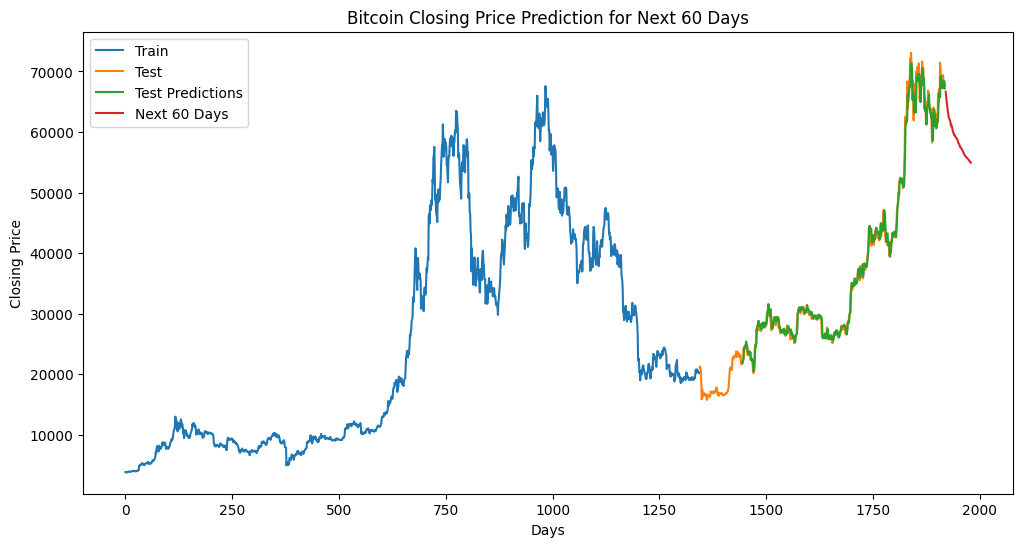

Predicted closing prices for the next 60 days:
[66635.03  65963.09  65205.887 64624.63  64108.605 63406.598 62986.074
 62453.76  62271.203 62109.56  61863.887 61720.49  61107.98  61214.594
 60791.51  60851.46  60437.406 60069.258 59925.637 59607.75  59675.207
 59374.09  59360.996 59232.695 59136.22  59012.793 58884.652 58843.777
 58563.703 58330.99  58170.703 58071.016 57922.227 57676.49  57497.293
 57483.113 57330.43  57253.75  57106.56  56967.8   56874.758 56699.348
 56548.77  56372.844 56232.883 56131.63  56030.97  55950.836 55848.637
 55777.36  55698.965 55629.27  55573.73  55457.734 55381.082 55286.703
 55189.76  55102.59  54999.797 54928.043]


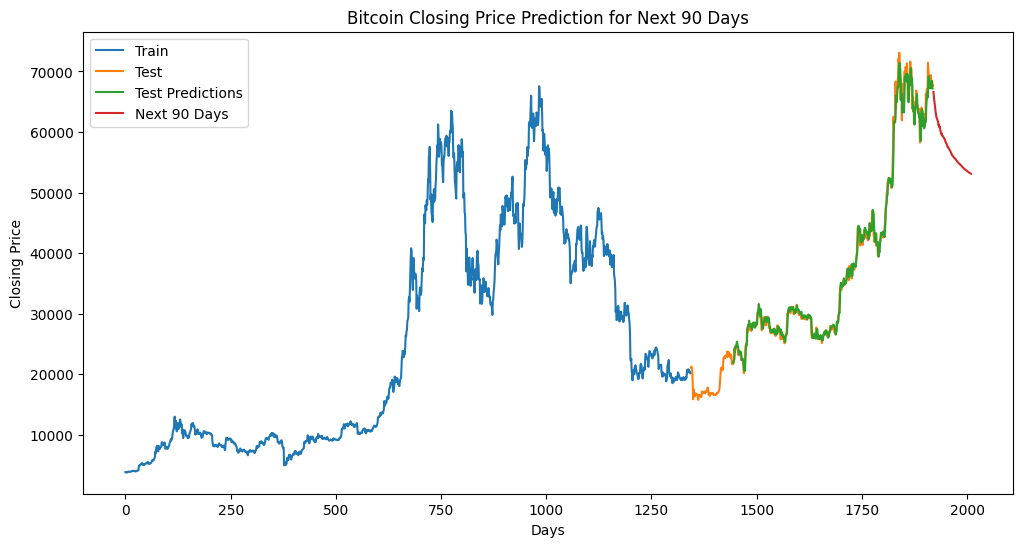

Predicted closing prices for the next 90 days:
[66635.03  65963.09  65205.887 64624.63  64108.605 63406.598 62986.074
 62453.76  62271.203 62109.56  61863.887 61720.49  61107.98  61214.594
 60791.51  60851.46  60437.406 60069.258 59925.637 59607.75  59675.207
 59374.09  59360.996 59232.695 59136.22  59012.793 58884.652 58843.777
 58563.703 58330.99  58170.703 58071.016 57922.227 57676.49  57497.293
 57483.113 57330.43  57253.75  57106.56  56967.8   56874.758 56699.348
 56548.77  56372.844 56232.883 56131.63  56030.97  55950.836 55848.637
 55777.36  55698.965 55629.27  55573.73  55457.734 55381.082 55286.703
 55189.76  55102.59  54999.797 54928.043 54856.297 54780.992 54727.953
 54669.01  54601.293 54523.69  54464.97  54371.957 54294.676 54204.098
 54137.26  54074.094 54004.883 53937.996 53886.33  53829.727 53783.496
 53730.504 53672.902 53618.926 53565.953 53505.92  53450.21  53392.223
 53339.85  53288.82  53241.86  53198.055 53158.15  53123.145]


In [25]:
# 13. Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

     # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 6:4**

In [26]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Btc.csv')
df1=df.reset_index()['Close']

In [27]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [29]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [30]:
# 6. Reshape thành X=t,t+1,t+2..t+99  Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [32]:
# 8. Define SimpleRNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 47ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 2/100
17/17 [==============================] - 0s 25ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/100
17/17 [==============================] - 0s 27ms/step - loss: 0.0010 - val_loss: 9.7538e-04
Epoch 4/100
17/17 [==============================] - 0s 24ms/step - loss: 9.0076e-04 - val_loss: 7.9212e-04
Epoch 5/100
17/17 [==============================] - 0s 26ms/step - loss: 8.9723e-04 - val_loss: 7.4865e-04
Epoch 6/100
17/17 [==============================] - 0s 24ms/step - loss: 8.3657e-04 - val_loss: 5.7359e-04
Epoch 7/100
17/17 [==============================] - 0s 25ms/step - loss: 7.7509e-04 - val_loss: 6.4393e-04
Epoch 8/100
17/17 [==============================] - 0s 26ms/step - loss: 7.1581e-04 - val_loss: 5.8830e-04
Epoch 9/100
17/17 [==============================] - 0s 24ms/step - loss: 6.6589e-04 - val_loss: 5.2691e-04
Epoch 10/100
17/17 [============================

In [34]:
# 10. Dự báo dữ liệu train, test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

21/21 [==============================] - 0s 7ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [36]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 737.8995178673163
Testing RMSE: 1110.2427550256027
Testing MAPE: 0.02206774482466762


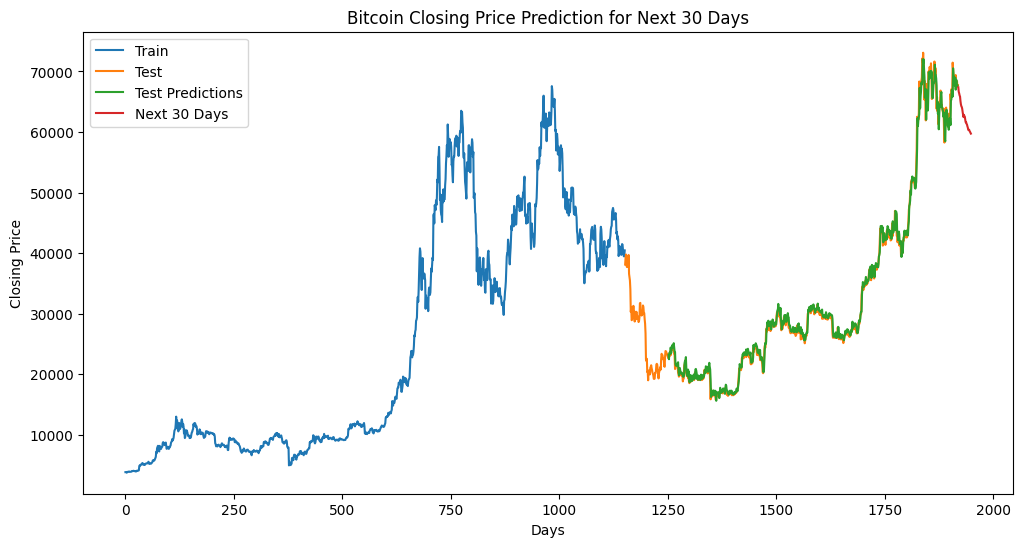

Predicted closing prices for the next 30 days:
[67368.23  66648.5   66381.195 66034.68  65858.07  65099.582 64568.06
 64263.742 64120.28  63839.414 63319.94  62854.06  62447.2   62837.484
 62609.402 62535.914 62037.688 61598.355 61629.062 61353.195 61233.082
 60934.88  60710.25  60349.87  60390.617 60362.297 60145.02  60038.43
 59878.9   59732.4  ]


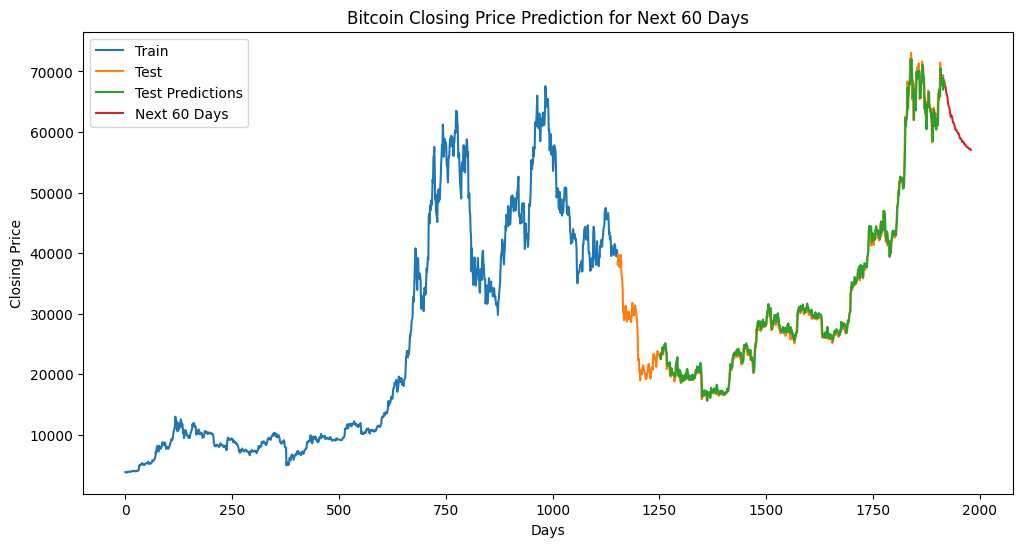

Predicted closing prices for the next 60 days:
[67368.23  66648.5   66381.195 66034.68  65858.07  65099.582 64568.06
 64263.742 64120.28  63839.414 63319.94  62854.06  62447.2   62837.484
 62609.402 62535.914 62037.688 61598.355 61629.062 61353.195 61233.082
 60934.88  60710.25  60349.87  60390.617 60362.297 60145.02  60038.43
 59878.9   59732.4   59752.613 59657.42  59354.01  59043.566 58910.285
 58968.74  58819.33  58775.605 58497.254 58337.773 58421.74  58428.543
 58324.805 58103.887 57950.945 57941.52  57966.707 57838.086 57670.44
 57542.168 57476.027 57477.52  57462.812 57393.984 57256.906 57208.215
 57186.723 57232.395 57171.22  57039.51 ]


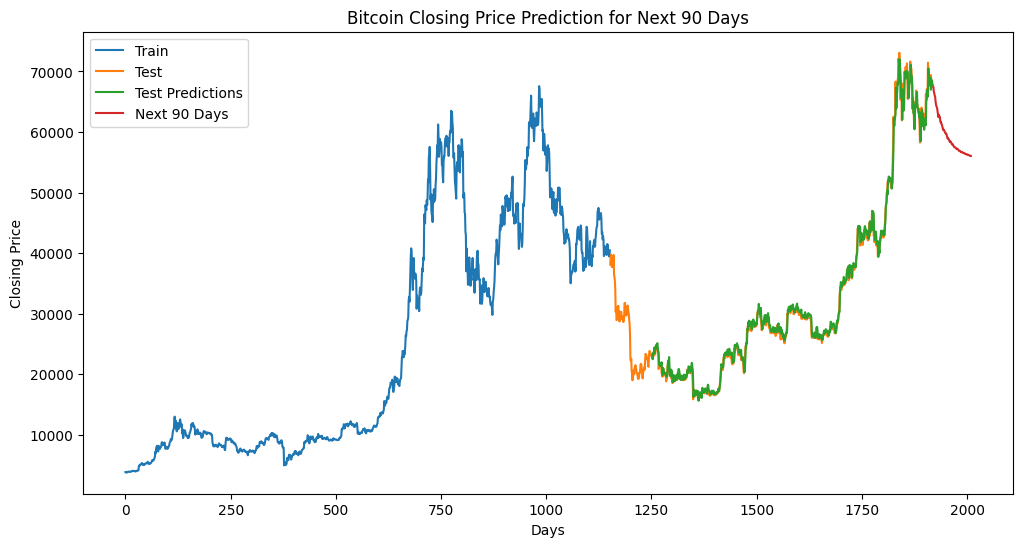

Predicted closing prices for the next 90 days:
[67368.23  66648.5   66381.195 66034.68  65858.07  65099.582 64568.06
 64263.742 64120.28  63839.414 63319.94  62854.06  62447.2   62837.484
 62609.402 62535.914 62037.688 61598.355 61629.062 61353.195 61233.082
 60934.88  60710.25  60349.87  60390.617 60362.297 60145.02  60038.43
 59878.9   59732.4   59752.613 59657.42  59354.01  59043.566 58910.285
 58968.74  58819.33  58775.605 58497.254 58337.773 58421.74  58428.543
 58324.805 58103.887 57950.945 57941.52  57966.707 57838.086 57670.44
 57542.168 57476.027 57477.52  57462.812 57393.984 57256.906 57208.215
 57186.723 57232.395 57171.22  57039.51  56925.58  56896.992 56916.695
 56892.348 56795.03  56691.824 56652.582 56683.793 56709.227 56660.867
 56572.945 56521.02  56528.51  56529.09  56501.42  56418.39  56342.77
 56336.06  56329.453 56357.3   56297.906 56236.3   56195.457 56201.48
 56221.24  56182.12  56115.914 56041.05  56039.125 56046.348]


In [37]:
# 13. Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

     # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())